In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading the dataset
df = pd.read_csv('household_power_consumption.txt', sep=';',
                 na_values = '?',dtype = float ,low_memory=False,infer_datetime_format=True,
                 parse_dates={'datetime':[0,1]}, index_col=['datetime'])

In [3]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
#check for missing values
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [5]:
df.shape

(2075259, 7)

In [6]:
#filling the missing values with the mean
df = df.fillna(df.mean())

In [7]:
df.shape

(2075259, 7)

In [8]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [9]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


**Resampling (undersampling the time series data)**

In [10]:
#daily resampling
daily_df = df.resample('D').sum()

In [11]:
print(daily_df.shape)
daily_df.head()

(1442, 7)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [12]:
def plot_state(col_name):
    plt.figure(figsize=(10,6))
    plt.plot(daily_df.index, daily_df[col_name],'--', marker='*')
    plt.grid()
    plt.xlabel('DateTime')
    plt.ylabel(col_name)

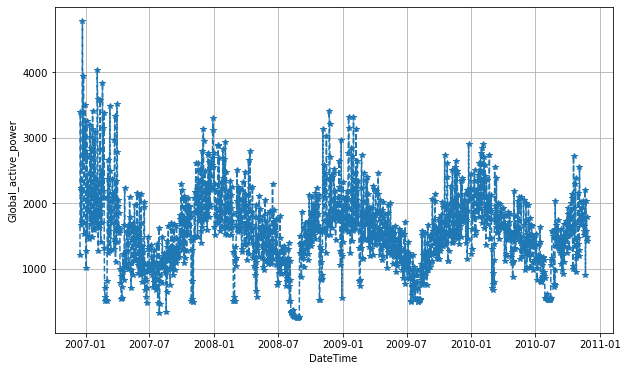

In [13]:
# plot of Global_active_power on th daily time frame
plot_state("Global_active_power")

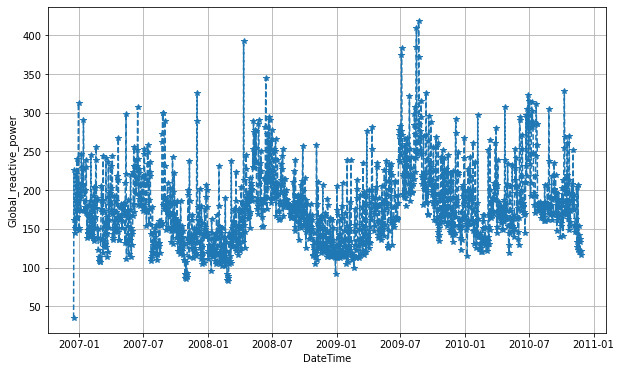

In [14]:
# plot of Global_reactive_power on th daily time frame
plot_state("Global_reactive_power")

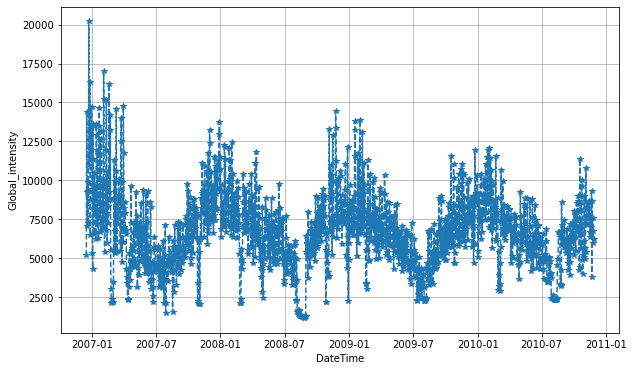

In [15]:
# plot of Global_intensity on th daily time frame
plot_state("Global_intensity")


In [54]:
# from libraries.settings import *
from scipy.stats.stats import pearsonr
import itertools
correlations = {}
columns = df.columns.tolist()

for col_a, col_b in itertools.combinations(columns, 2):
    correlations[col_a + '__' + col_b] = pearsonr(df.loc[:, col_a], df.loc[:, col_b])

result = pd.DataFrame.from_dict(correlations, orient='index')
result.columns = ['PCC', 'p-value']

print(result.sort_index())

                                                 PCC  p-value
Global_active_power__Global_intensity       0.998889      0.0
Global_active_power__Global_reactive_power  0.247017      0.0
Global_active_power__Sub_metering_1         0.484401      0.0
Global_active_power__Sub_metering_2         0.434569      0.0
Global_active_power__Sub_metering_3         0.638555      0.0
Global_active_power__Voltage               -0.399762      0.0
Global_intensity__Sub_metering_1            0.489298      0.0
Global_intensity__Sub_metering_2            0.440347      0.0
Global_intensity__Sub_metering_3            0.626543      0.0
Global_reactive_power__Global_intensity     0.266120      0.0
Global_reactive_power__Sub_metering_1       0.123111      0.0
Global_reactive_power__Sub_metering_2       0.139231      0.0
Global_reactive_power__Sub_metering_3       0.089617      0.0
Global_reactive_power__Voltage             -0.112246      0.0
Sub_metering_1__Sub_metering_2              0.054721      0.0
Sub_mete

In [16]:
from scipy.stats import pearsonr
pearsonr(df['Global_active_power'],df['Global_reactive_power'])

(0.24701705264431473, 0.0)

In [20]:
#correlation coefficient between the Voltage andglobal_intensity
from scipy.stats import pearsonr
corr = pearsonr(df['Voltage'],df['Global_intensity'])
corr

(-0.4113630717684046, 0.0)

### Time Series Specific Exploratory Methods

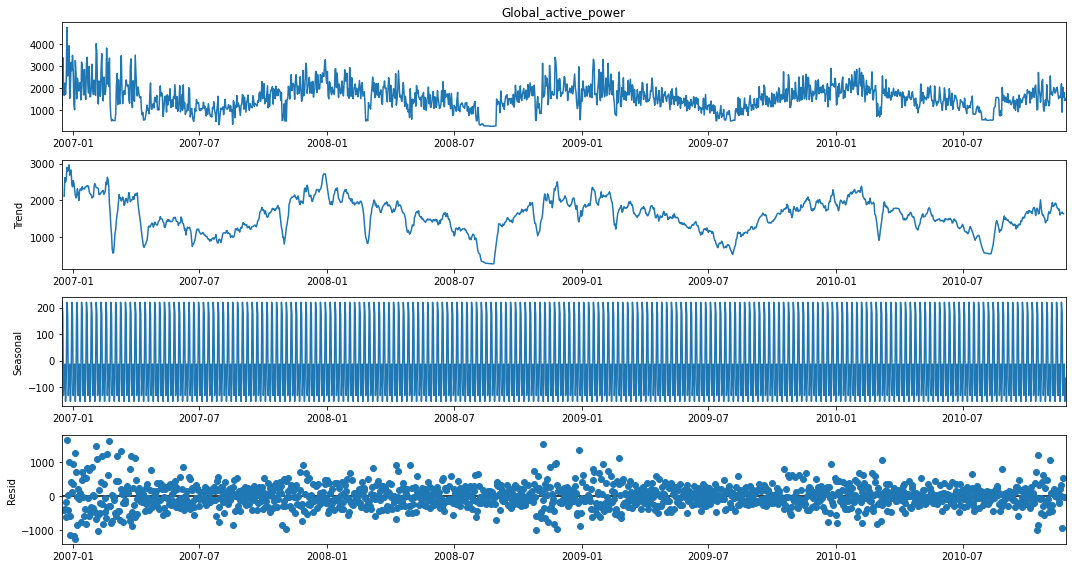

In [21]:
import statsmodels.api as sm
from pylab import rcParams

### testing for daily time series
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(daily_df['Global_active_power'], model='additive')
decompose_series.plot()
plt.show()

**ADF test for stationarity**

In [22]:
# Augmented Dickey-Fuller Test (ADF Test) to check for stationarity
from statsmodels.tsa.stattools import adfuller

#since we have several samples of time series lets define a function that could check for
#stationarity and output the various columns that are stationary in the series.

def adf_test(d_set):
    adf_result = adfuller(d_set, autolag='AIC')
    print(f'ADF Statistic: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')
    print(f'No. of lags used: {adf_result[2]}')
    print(f'No. of observations used : {adf_result[3]}')
    print('Critical Values:')
    for k, v in adf_result[4].items():
        print(f'   {k}: {v}') 

    p = adf_result[1]
    if p <= 0.05:
        print("Stationarity: True")
        print('======================================\n')
    else:
        print("Stationarity: False")
        print('======================================\n\n')

# this function takes a time series datframe and checks the columns that are stationary.
def get_stationarity(data):
    for i in data.columns:
        print("Column: ",i)
        print('======================================')
        adf_test(data[i])


In [23]:
 #test for stationarity for daily time series
get_stationarity(daily_df)

Column:  Global_active_power
ADF Statistic: -3.731703845267441
p-value: 0.0036886778465985573
No. of lags used: 22
No. of observations used : 1419
Critical Values:
   1%: -3.434966750462565
   5%: -2.8635789736973725
   10%: -2.5678555388041384
Stationarity: True

Column:  Global_reactive_power
ADF Statistic: -3.8258508782879064
p-value: 0.0026536286982083946
No. of lags used: 22
No. of observations used : 1419
Critical Values:
   1%: -3.434966750462565
   5%: -2.8635789736973725
   10%: -2.5678555388041384
Stationarity: True

Column:  Voltage
ADF Statistic: -2.959236896288301
p-value: 0.03888052099723622
No. of lags used: 23
No. of observations used : 1418
Critical Values:
   1%: -3.4349700122033804
   5%: -2.8635804131233096
   10%: -2.567856305330816
Stationarity: True

Column:  Global_intensity
ADF Statistic: -3.8315901949388
p-value: 0.002600148450486235
No. of lags used: 22
No. of observations used : 1419
Critical Values:
   1%: -3.434966750462565
   5%: -2.8635789736973725
   10


Inference: all the columns in DAILY_DF are stationary


**Visualizing the stationary series**

In [24]:
rolling_mean = daily_df.rolling(365).mean()

In [25]:
def visualise_state(col_name):
    plt.figure(figsize=(10,6))
    original = plt.plot(daily_df.index, daily_df[col_name],'--', marker='*', color = 'blue',label = 'original')
    mean = plt.plot(rolling_mean.index, rolling_mean[col_name], color = 'red',label = 'rolling mean')
    plt.grid()
    plt.legend(loc = 'best')
    plt.xlabel('Datetime')
    plt.ylabel(col_name)

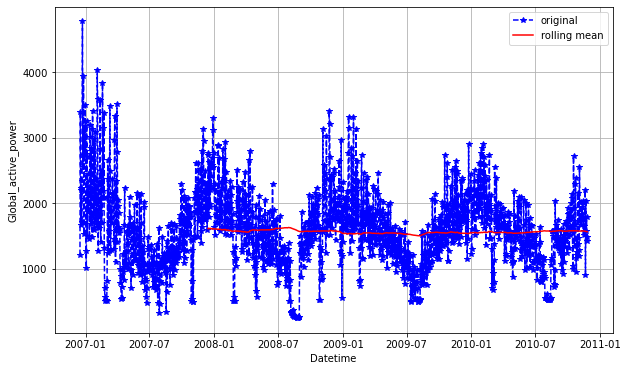

In [26]:
# plotting for Global_active_power
visualise_state("Global_active_power")

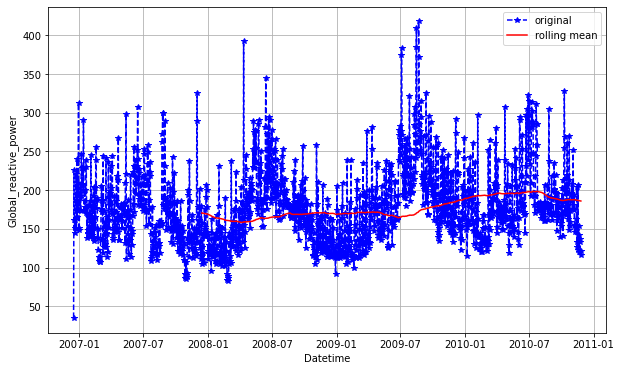

In [27]:
# plotting for Global_reactive_power
visualise_state("Global_reactive_power")

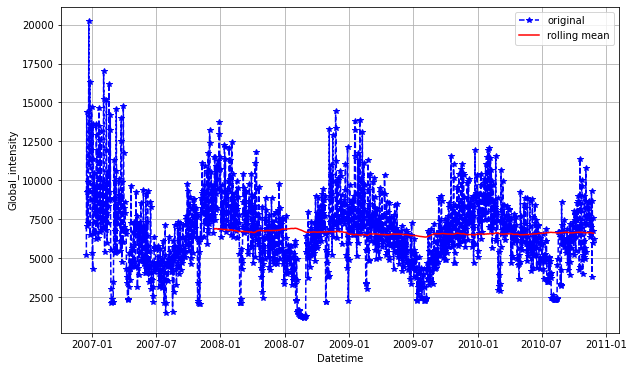

In [28]:
# plotting for Global_intensity
visualise_state("Global_intensity")


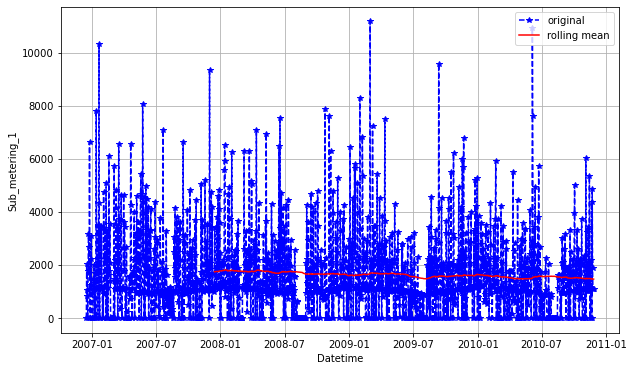

In [29]:
# plotting for sub_metring_1
visualise_state("Sub_metering_1")

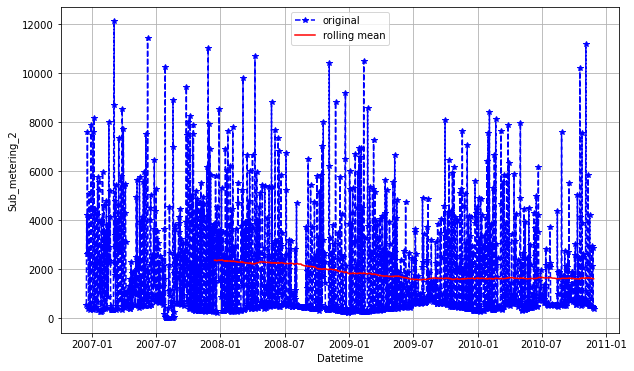

In [30]:
# plotting for sub_metring_2
visualise_state("Sub_metering_2")

to create a model with the dataset we have to first convert the non-stationary columns to stationary as most of the libraries used in creating time series forecast models assume stationarity.

**FB prophet Model**

In [31]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [32]:
#we have to reset the datetime index and assign it as a column in the new dataframe
daily_df.reset_index(inplace=True)
prophet_daily = daily_df[['datetime','Global_active_power']]


In [33]:
#renaming the columns 
prophet_daily = prophet_daily.rename(columns = {'datetime': 'ds','Global_active_power': 'y'})
print(prophet_daily.shape)
prophet_daily.head()


(1442, 2)


,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [34]:
train_set, test_set  = prophet_daily.iloc[:1077,:], prophet_daily.iloc[1077:,:]

In [35]:
#fitting the model to the dataset
model = Prophet(daily_seasonality=True)
model.fit(train_set)
pred = model.predict(test_set)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


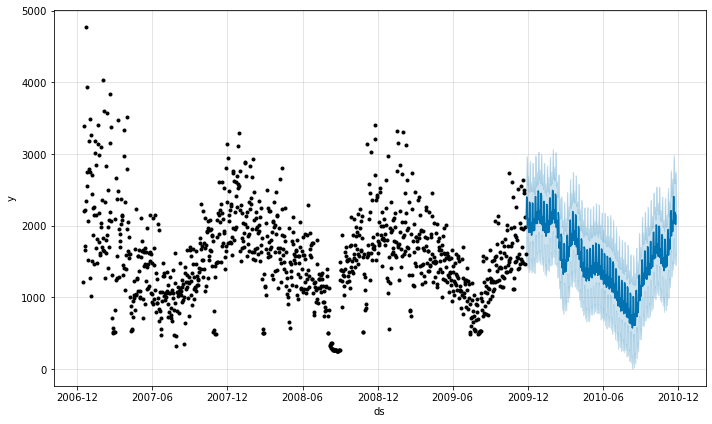

In [36]:
model.plot(pred)
plt.show()

In [37]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(np.array(test_set['y']),np.array(pred['yhat'])))
print(f'RMSE: {round(rmse,2)}')

RMSE: 374.58


**Question: 15**

In [38]:
# Define a model for the calculation of MAPE
def Metric(y_true,y_pred):
    y_true,y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true)) *100
mape = Metric(test_set['y'],pred['yhat'])
print(f'MAPE: {round(mape,2)}')

MAPE: 20.81


**Question: 16**

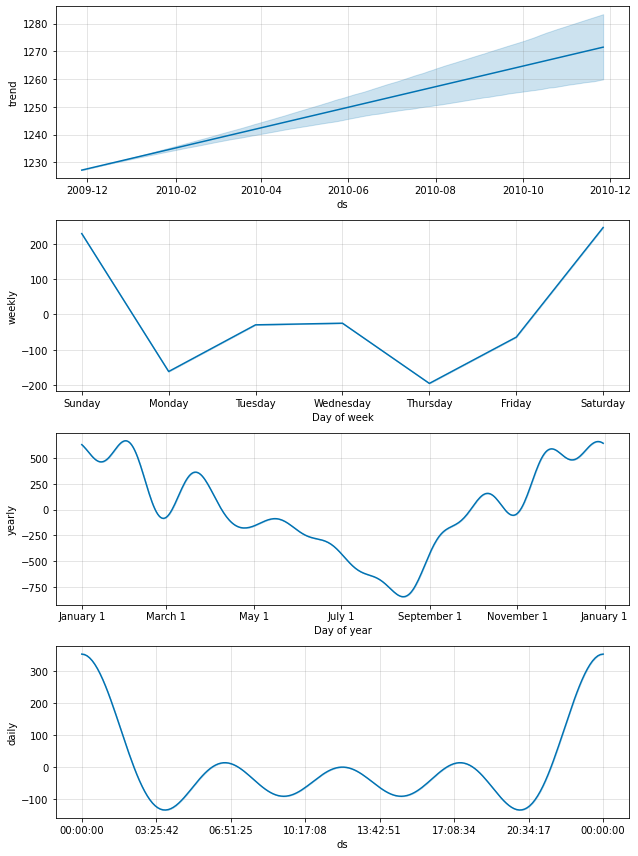

In [39]:
model.plot_components(pred)
plt.show()

#### Remark: AUGUST has the lowest value.

## 

**Multivariate Model**

In [41]:
# reseting the index column of the daily_df
daily_df2 = daily_df
daily_df2.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [42]:
# Renaming the columns
daily_df2 = daily_df2.rename(columns = {'datetime':'ds','Global_active_power':'y','Global_reactive_power':'add1',
                                                'Voltage':'add2','Global_intensity':'add3','Sub_metering_1':'add4',
                                                'Sub_metering_2':'add5','Sub_metering_3':'add6'})

In [43]:
#checking the renamed dataframe
daily_df2.head()

,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [44]:
train_set_2,test_set_2 = daily_df2.iloc[:1077,:], daily_df2.iloc[1077:,:]
print(train_set_2.shape)
print(test_set_2.shape)

(1077, 8)
(365, 8)


In [45]:
# Creating the prophet multivariate model
model_2 = Prophet(daily_seasonality=True)
model_2.add_regressor('add1')
model_2.add_regressor('add2')
model_2.add_regressor('add3')
model_2.add_regressor('add4')
model_2.add_regressor('add5')
model_2.add_regressor('add6')

In [46]:
# Fitting the model to train set
model_2.fit(train_set_2)

In [47]:
# Making prediction with test_set
pred_2 = model_2.predict(test_set_2)

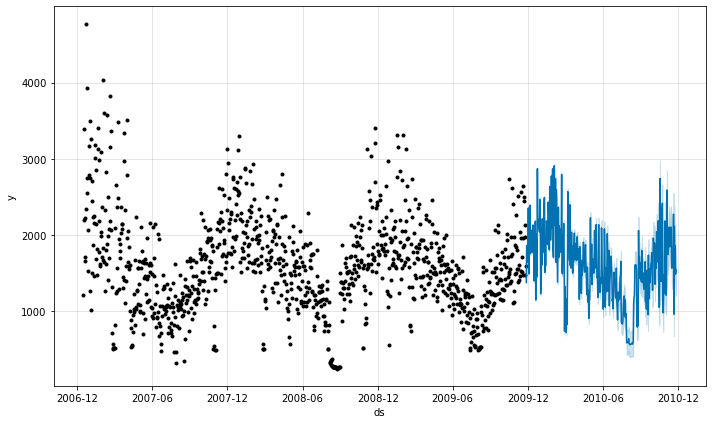

In [48]:
model.plot(pred_2)
plt.show()

**Question: 17**

In [49]:
# calculating the MAPE using the previously defined function
mape = Metric(test_set_2['y'],pred_2['yhat'])
print(f'MAPE: {round(mape,2)}')

MAPE: 2.67


**Question: 18**

In [50]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(np.array(test_set_2['y']),np.array(pred_2['yhat'])))
print(f'RMSE: {round(rmse,2)}')

RMSE: 39.79


**Question. 19**

In [ ]:
model_2.plot_components(pred_2)

#### Remark: TUESDAY has the lowest value